                       open    high     low   close  volume        RSI  \
datetime                                                                 
2024-01-24 10:45:00  616.15  616.50  615.40  615.50  255479  77.478521   
2024-01-24 11:20:00  621.45  621.95  618.50  618.60  249076  77.478521   
2024-01-24 11:25:00  618.70  619.20  616.20  616.30  297790  77.478521   
2024-01-24 11:30:00  616.30  616.85  614.00  615.65  340166  77.478521   
2024-01-24 11:35:00  615.45  617.80  615.45  616.35  296855  77.478521   
...                     ...     ...     ...     ...     ...        ...   
2024-01-25 13:50:00  606.85  607.60  606.70  607.20  141262  77.478521   
2024-01-25 14:00:00  607.55  607.95  606.95  607.15  158824  77.478521   
2024-01-25 14:05:00  607.15  607.85  606.45  606.80  239580  77.478521   
2024-01-25 14:10:00  606.90  607.20  606.30  606.75  197994  77.478521   
2024-01-25 14:15:00  606.75  607.40  606.70  607.00  160306  77.478521   

                     ema9_ohlc4 Signa

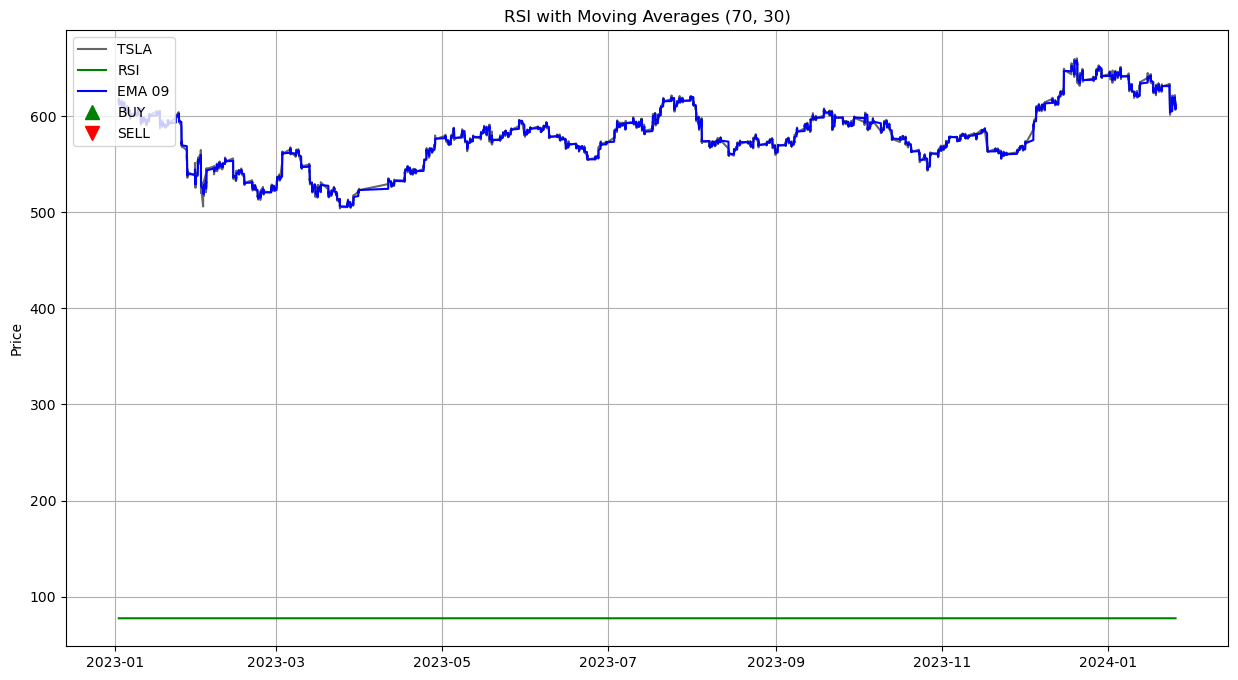

In [2]:
import pandas as pd
import pandas_ta as pta  
import ta
import traceback2
from matplotlib import pyplot as plt

df = None

# Read data from CSV file
df = pd.read_csv('sbi_data.csv', parse_dates=['datetime'])
df.set_index('datetime', inplace=True)

def generate_rsi_signals(data, period=14, overbought_threshold=70, oversold_threshold=30):
   
    # Calculate RSI
    data['RSI'] = ta.momentum.RSIIndicator(data['close'], period, False).rsi().iloc[-1]
    data['ema9_ohlc4'] = pta.ema(pta.ohlc4(df["open"], df["high"], df["low"], df["close"]), length=9)
    # Initialize 'Signal' column with 'Neutral'
    data['Signal'] = 'Neutral'

    # Generate signals
    buy_condition = (data['RSI'] < oversold_threshold) & (data['close'] >  data['ema9_ohlc4'])
    sell_condition = (data['RSI'] > overbought_threshold) & (data['close'] <  data['ema9_ohlc4'])

    data.loc[buy_condition, 'Signal'] = 'Buy'
    data.loc[sell_condition, 'Signal'] = 'Sell'

    return data
def plot_crossover():
    global df
    #plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.grid()
    plt.ylabel("Price")
    plt.plot(df['close'], label = 'TSLA', color = 'k',alpha = 0.6)
    plt.plot(df['RSI'], label = 'RSI',color = 'g')
    plt.plot( df['ema9_ohlc4'], label = 'EMA 09',color = 'b')
    plt.plot(df[df["ema9_ohlc4"] == 1].index, 
         df['ema9_ohlc4'][df["ema9_ohlc4"] == 1], 
         "^", markersize = 10, color = 'g', label = 'BUY')
    
    plt.plot(df[df["ema9_ohlc4"] == -1].index, 
         df['ema9_ohlc4'][df["ema9_ohlc4"] == -1], 
         "v", markersize = 10, color = 'r', label = 'SELL')

    plt.title('RSI with Moving Averages (70, 30)')
    plt.legend(loc = 'upper left')
    plt.show()
    
    
df_rsi = generate_rsi_signals(df)
filtered_df = df_rsi[df_rsi['Signal'] == 'Sell']
print(filtered_df.tail(80))
plot_crossover()

